In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data2.txt", header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

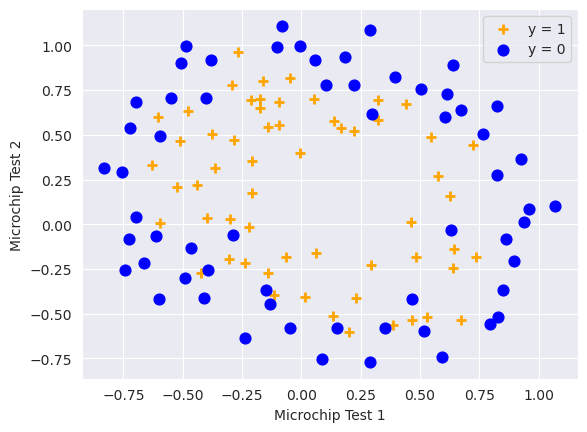

In [4]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [5]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

In [6]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [7]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [8]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [9]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [10]:
from scipy import optimize
initial_theta = np.zeros((XX.shape[1],1))

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y)
print(theta)
print(mincost)

/tmp/ipykernel_48970/612736185.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
/tmp/ipykernel_48970/1800741907.py:6: RuntimeWarning: divide by zero encountered in log
  term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:7: RuntimeWarning: divide by zero encountered in log
  term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))


[[ 8.46579852e+02  3.08878501e+03  1.57820350e+03 -6.12721198e+03
  -9.48716347e+03  6.14544334e+03 -1.75845864e+04 -7.61037265e+03
  -3.90413934e+04 -6.11903500e+03  3.92723709e+03  6.97823044e+04
   1.08918591e+04 -7.83290449e+03 -3.11400901e+04  1.00519424e+04
   2.36807918e+04  9.83070825e+04 -7.38505139e+03  1.05094401e+05
   3.37157605e+04  3.57854839e+04 -1.12662147e+05 -5.55436521e+04
   3.17383467e+04  3.27884409e+02 -5.77322350e+04  1.11060591e+04
   4.74675315e+04 -3.76305957e+03 -5.03245344e+02  3.57008476e+04
  -1.32933034e+05  4.19418707e+04  7.41147548e+04 -4.56117031e+03
  -1.89725088e+04 -1.77765018e+04 -1.79629598e+04 -5.73644902e+04
  -5.61389648e+04 -2.18274805e+04 -3.96868233e+03 -1.56134567e+01
  -3.79350297e+04 -1.01343548e+04  1.07278689e+04  1.83860990e+04
   3.03358308e+04 -1.37242381e+05  1.48047061e+04 -3.26366227e+04
   1.34870257e+04 -2.60501896e+04  2.00397114e+04 -8.62501672e+04
   2.43451164e+04 -5.47745368e+03 -4.04542284e+03 -3.19735588e+04
  -6.49029

/tmp/ipykernel_48970/1800741907.py:6: RuntimeWarning: divide by zero encountered in log
  term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:7: RuntimeWarning: divide by zero encountered in log
  term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:6: RuntimeWarning: divide by zero encountered in log
  term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:7: RuntimeWarning: divide by zero encountered in log
  term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))


In [11]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

/tmp/ipykernel_48970/612736185.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
/tmp/ipykernel_48970/1800741907.py:6: RuntimeWarning: divide by zero encountered in log
  term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:7: RuntimeWarning: divide by zero encountered in log
  term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:6: RuntimeWarning: divide by zero encountered in log
  term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:7: RuntimeWarning: divide by zero encountered in log
  term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
/tmp/ipykernel_48970/1800741907.py:6: RuntimeWarning: divi

[[ 8.46579852e+02  3.08878501e+03  1.57820350e+03 -6.12721198e+03
  -9.48716347e+03  6.14544334e+03 -1.75845864e+04 -7.61037265e+03
  -3.90413934e+04 -6.11903500e+03  3.92723709e+03  6.97823044e+04
   1.08918591e+04 -7.83290449e+03 -3.11400901e+04  1.00519424e+04
   2.36807918e+04  9.83070825e+04 -7.38505139e+03  1.05094401e+05
   3.37157605e+04  3.57854839e+04 -1.12662147e+05 -5.55436521e+04
   3.17383467e+04  3.27884409e+02 -5.77322350e+04  1.11060591e+04
   4.74675315e+04 -3.76305957e+03 -5.03245344e+02  3.57008476e+04
  -1.32933034e+05  4.19418707e+04  7.41147548e+04 -4.56117031e+03
  -1.89725088e+04 -1.77765018e+04 -1.79629598e+04 -5.73644902e+04
  -5.61389648e+04 -2.18274805e+04 -3.96868233e+03 -1.56134567e+01
  -3.79350297e+04 -1.01343548e+04  1.07278689e+04  1.83860990e+04
   3.03358308e+04 -1.37242381e+05  1.48047061e+04 -3.26366227e+04
   1.34870257e+04 -2.60501896e+04  2.00397114e+04 -8.62501672e+04
   2.43451164e+04 -5.47745368e+03 -4.04542284e+03 -3.19735588e+04
  -6.49029

/tmp/ipykernel_48970/612736185.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )


[[ 1.24792903  0.64758648  1.17350012 -1.91758739 -0.91372464 -1.36599866
   0.23346089 -0.37618552 -0.37958277 -0.03282338 -1.32000761 -0.04712996
  -0.62780658 -0.28263377 -1.01637887 -0.11566296 -0.20369113 -0.04637144
  -0.27664284 -0.31290036 -0.24315446 -0.90466857  0.03279962 -0.29270783
   0.01538726 -0.32510348 -0.15677866 -0.69328463 -0.23644572 -0.09254346
  -0.0407618  -0.11439749 -0.03172908 -0.16746877 -0.21369742 -0.25963011
  -0.64126093  0.03979266 -0.1530425   0.01451904 -0.12836663  0.01445244
  -0.18502722 -0.106854   -0.48156588 -0.25824889 -0.04109608 -0.03623444
  -0.04510194 -0.01750733 -0.06405343 -0.01202489 -0.10457967 -0.1463657
  -0.23609351 -0.46848961  0.03263652 -0.08875202  0.00976199 -0.05649457
   0.00662829 -0.06713194  0.01311344 -0.1127893  -0.08076081 -0.34920336]] 

Cost :  0.5205017253896623 
 
 
[[ 3.47657992e-01  1.02435877e-02  1.95412063e-01 -4.32344363e-01
  -1.12363371e-01 -2.43408010e-01 -4.79511176e-02 -5.76086320e-02
  -6.84476952e-02 -

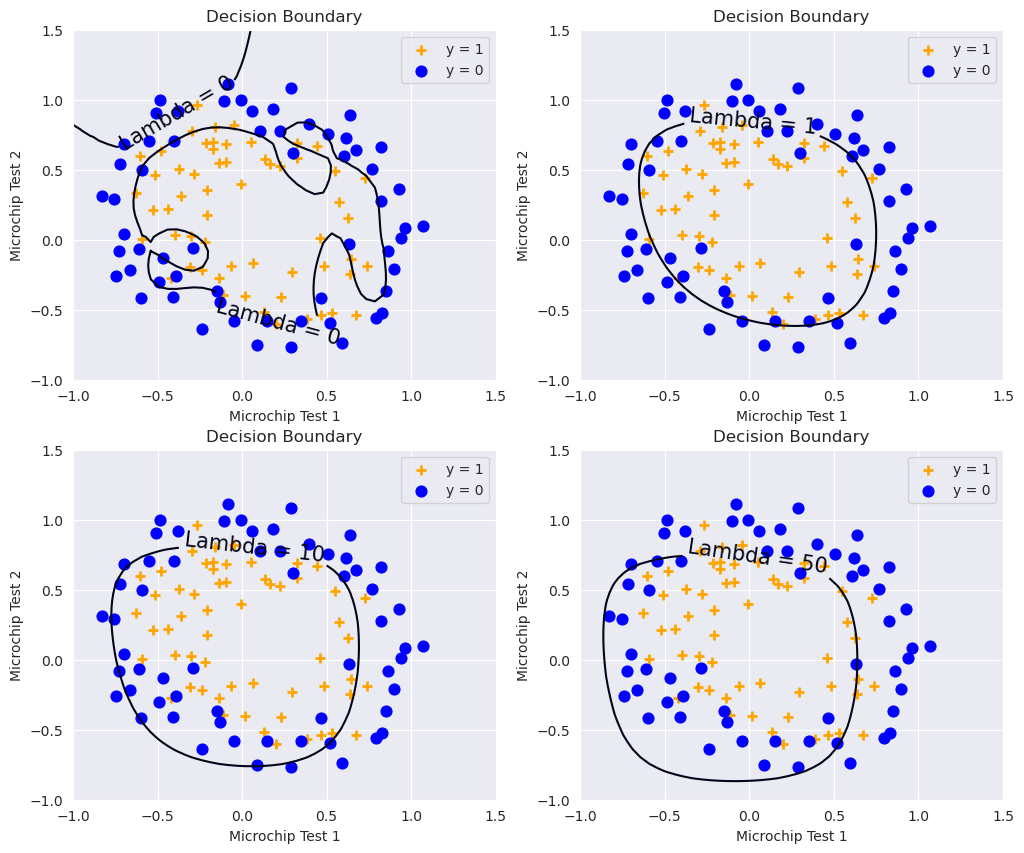

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)